# Superposition and the Infinite Potential Well

## Libraries and constants

In [1]:
import numpy as np
import math
from scipy.special import eval_hermite as herm # evaluates n'th order hermite polynomials 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# constants for the infinite well
k = 20 # force constant  
omega = np.sqrt(k) # using atomic units, so m = 1

# some limits for our plots 
x1 = -7.5
x2 = 7.5

# length of array (number of times we sample each function)
nmax = 300 

# step in x values
step = (x2-x1) / nmax 

# Gaussian pulse
shift = 2
sigma = (x2 - x1) / 180 # standard deviation (width) of gaussian
mu = -x1 + shift # expected position (centres gaussian at x = shift )

# introduce the dimensionless variable xi in place of x
def xi(x):
    return np.sqrt(omega) * x 

## Gaussian Function

In [2]:
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# an empty array of length nmax
g = np.empty(nmax) 

# filling array with values from our gaussian
for x in np.arange(0, nmax): 
    g[x] = np.sqrt(gaussian(x * step, mu, sigma))

## Eigenfunctions of the harmonic oscillator

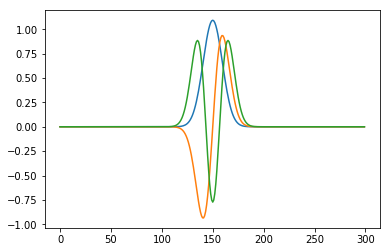

In [3]:
def psi(n, x):
    An = (omega / np.pi)**(1/4) * (1. / (math.sqrt(math.factorial(n)) * math.sqrt(2**n)))
    return An * herm(n, xi(x)) * np.exp(-0.5 * (xi(x)**2))  

# an array of 'num' eigenfunctions
num = 50
 
eigs = np.empty((num, nmax))

for n in range(0, num): 
    for x in np.arange(0, nmax, 1):
        eigs[n, x] = psi(n, x  * step + x1) 
        
plt.plot(eigs[0])
plt.plot(eigs[1])
plt.plot(eigs[2])

## Calculating coefficients and energies 

In [4]:
# calculating the weighting of each eigenfunction
cn = np.zeros(num)

for i in range(0, num):
    cn[i] = step * sum(g * eigs[i])

# calculating the energy eigenvalues for each eigenfunction (needed for time-dependent term)
energy = np.empty(num)

for n in range(0, num):
    energy[n] = (n + 1/2) 

## Comparing superposition state with gaussian curve

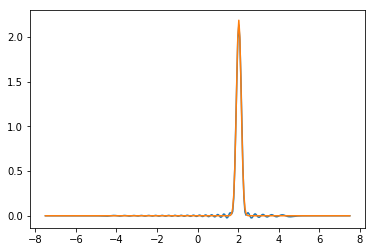

In [5]:
# superposition state
psi_0 = 0
for i in range(0, num):
    psi_0 = psi_0 + cn[i] * eigs[i]

xs = np.linspace(x1, x2, nmax)
plt.plot(xs, psi_0)
plt.plot(xs, g)

## Animation

In [6]:
def animate(t):
    """
    this function gets called by animation (imported from matplotlib)
    each time called, it will replot with a different values for t
    
    Parameters:
        t : float
            used as a counter to display different frames of the animation 
    
    """
    
    #  defining how the wavefunction evolves with time, t
    obj = 0
    for n in range(0, num):
        obj += cn[n] * eigs[n] * np.exp(-1j * energy[n] * t)  
     
    # setting y data for the real, imaginary, total magnitude and probability distribution plots
    _prob = obj.real**2 + obj.imag**2
    
    real.set_ydata(obj.real)
    imag.set_ydata(obj.imag)
    prob.set_ydata(_prob)
    mag.set_ydata(np.sqrt(_prob))

    # setting data for mean position
    _mean = sum(_prob * xs) * step
    
    ax3.plot(_mean, t, 'k.', ms = 1)
    mean.set_ydata(0)
    mean.set_xdata(_mean)
    
    # dynamically set the y axis of 3rd plot
    if t > 15:
        ax3.set_ylim(t - 15, t + 5)

In [7]:
%matplotlib notebook

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 12))
     
real, = ax1.plot(xs, eigs[1], '-b') 
imag, = ax1.plot(xs, eigs[1], '-r') 
mag, = ax1.plot(xs, eigs[1], '-k')
prob, = ax2.plot(xs, eigs[1], '-g')
mean, = ax2.plot(xs, eigs[1], 'ko')




def init():
    """
    initialize the figure object 
    
    Returns:
        real : a line object that will form the first frame of the plot
        
        imag : see above
        
        mag : see above
        
        prob : see above
        
        well : see above
    
    """
    
    ax1.set_xlim(0.75 * x1, 0.75 * x2)
    ax1.set_ylim(-3, 3)
    ax2.set_xlim(0.75 * x1, 0.75 * x2)
    ax2.set_ylim(0, 5)
    ax3.set_xlim(0.75 * x1, 0.75 * x2)
    ax3.set_ylim(0, 20)
    
    return real, imag, mag, prob, mean

# the FuncAnimation function iterates through our animate function using the ts array
dt = 0.025 # stepsize of the widths 
ts = np.arange(0, 2000, dt)
ani = FuncAnimation(fig, animate, ts, init_func=init, interval=30, blit=True) 
    # animation object, give it the figure object, the animate function, the input for the animate function,
    # the intialising function, interval - amount of time between each frame, blitting reduces time

plt.show()

<IPython.core.display.Javascript object>